In [5]:
import numpy as np
import matplotlib.pyplot as plt


Generate synthetic data

In [6]:
np.random.seed(42)

# Generate data
n_samples = 50
x1 = np.random.rand(n_samples) * 10
x2 = np.random.rand(n_samples) * 10
noise = np.random.randn(n_samples)

# True relationship
y = 2 * x1 + 3 * x2 + 5 + noise

# Stack features into one array
X = np.column_stack((x1, x2))  # shape (n_samples, 2)


Initialize parameters and hyperparameters

In [7]:
# Parameters: [m1, m2, b]
params = np.random.randn(3)  

# Gradient descent settings
learning_rate = 0.01
epochs = 1000  # must be defined as integer

# Lists to track loss and parameter updates
loss_history = []
params_history = []


Gradient descent loop

In [8]:
n = X.shape[0]

for i in range(epochs):
    # predictions
    y_pred = X @ params[:2] + params[2]  # m1*x1 + m2*x2 + b
    
    error = y - y_pred
    
    # gradients
    dm1 = -2 * np.mean(X[:, 0] * error)
    dm2 = -2 * np.mean(X[:, 1] * error)
    db = -2 * np.mean(error)
    
    # update parameters
    params[0] -= learning_rate * dm1
    params[1] -= learning_rate * dm2
    params[2] -= learning_rate * db
    
    # store history
    loss_history.append(np.mean(error**2))
    params_history.append(params.copy())
    
    if i % 100 == 0:
        print(f"Epoch {i}: m1 = {params[0]:.4f}, m2 = {params[1]:.4f}, b = {params[2]:.4f}, loss = {loss_history[-1]:.4f}")


Epoch 0: m1 = 2.7159, m2 = 3.6685, b = 0.8174, loss = 1482.6766
Epoch 100: m1 = 2.1790, m2 = 3.2908, b = 2.1854, loss = 2.8660
Epoch 200: m1 = 2.0889, m2 = 3.2019, b = 3.1998, loss = 1.8056
Epoch 300: m1 = 2.0248, m2 = 3.1387, b = 3.9209, loss = 1.2695
Epoch 400: m1 = 1.9792, m2 = 3.0938, b = 4.4337, loss = 0.9985
Epoch 500: m1 = 1.9468, m2 = 3.0618, b = 4.7982, loss = 0.8616
Epoch 600: m1 = 1.9237, m2 = 3.0391, b = 5.0574, loss = 0.7923
Epoch 700: m1 = 1.9074, m2 = 3.0229, b = 5.2417, loss = 0.7573
Epoch 800: m1 = 1.8957, m2 = 3.0114, b = 5.3728, loss = 0.7396
Epoch 900: m1 = 1.8874, m2 = 3.0033, b = 5.4659, loss = 0.7307


Check final parameters

In [9]:
m1, m2, b = params
print(f"Trained parameters: m1 = {m1:.4f}, m2 = {m2:.4f}, b = {b:.4f}")


Trained parameters: m1 = 1.8816, m2 = 2.9975, b = 5.5316


Plot loss over epochs

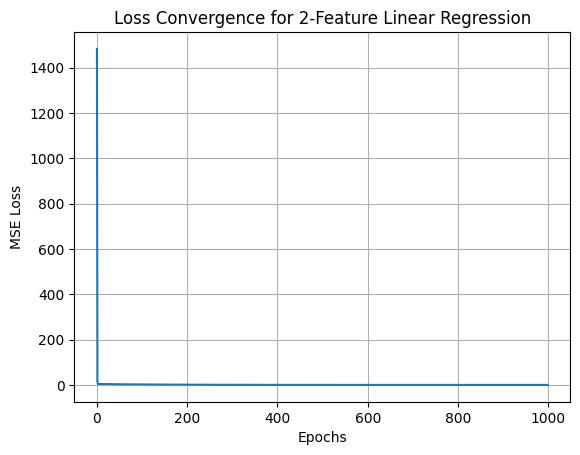

In [10]:
plt.plot(loss_history)
plt.title("Loss Convergence for 2-Feature Linear Regression")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()
